# Haberman Cancer Survival dataset

# Business Problem :-

##  Description :-
                      The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 
                      at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery 
                      for breast cancer.
              
source link:https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed

## Attribute Information:
            1) Age of patient at time of operation (numerical)
            2) Patient’s year of operation (year — 1900, numerical)
            3) Number of positive auxillary nodes detected (numerical)
            4) Survival status (class attribute) :
                                             1 = the patient survived 5 years or longer
                                             2 = the patient died within 5 years

#  1. Exploratory data Analysis :-

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Load the data

In [23]:
## read the heberman data
df = pd.read_csv("haberman.csv")
print(df)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67    66      0       1
277   67  

### dataset information:

                 here we will give you dataset information which is very helpfull to visualize data

                              1) age :patient at time of operation (numerical)
                              2) year :Patient’s year of operation (year — 1900, numerical)
                              3) nodes :Number of positive auxillary nodes detected (numerical)
                              4) status :Survival status (class attribute) :
                                          1 = the patient survived 5 years or longer 
                                          2 = the patient died within 5 years.
                  here
                        we have  3 input/independent variable(age,year,nodes),
                        1-output/dependent variable (status)
                        2 class(1 for the patient survived 5 year or longer and 2 for the patient died within 5 years)
  


### 1.2 number of data point /shape and size of data :

In [44]:
## datapoints and features ? or
## findout the shape
print(df.shape)

(306, 4)


### 1.3 Number of features:-

In [45]:
### how many columns ?
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


### 1.4  Number of classes :

In [46]:
### how many data point for each class ?
df["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

### observation:
                there are two classes (1,2) & that is imbalanced dataset

# 2. Bi-variate Analysis :

## 2.1 2-D scatter plot 

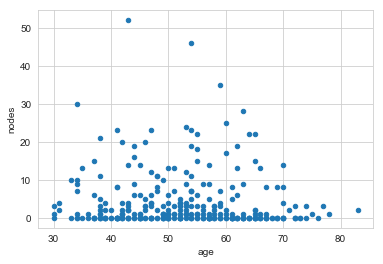

In [27]:
df.plot(kind="scatter",x="age",y="nodes")
plt.show()

### observation :
                    here through 2D scatter plot we categorized the age and nodes but they are not well seperated.
                    so we can use color for proper visualiztion

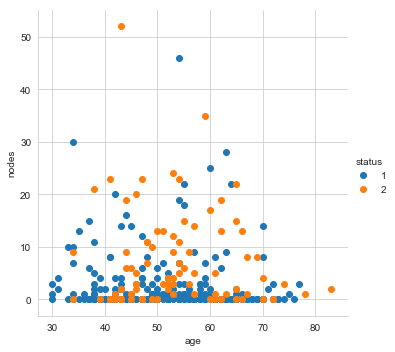

In [48]:
sns.FacetGrid(df,hue="status",size=5).map(plt.scatter,"age","nodes").add_legend()
plt.show()
## here blue and orange color not seperated well...they are overlapped to eachother

### observation :-
             using age and nodes features  we try to sepreate 1 and 2 class but its much harder as they have overlap

## 2.2 pair-plot

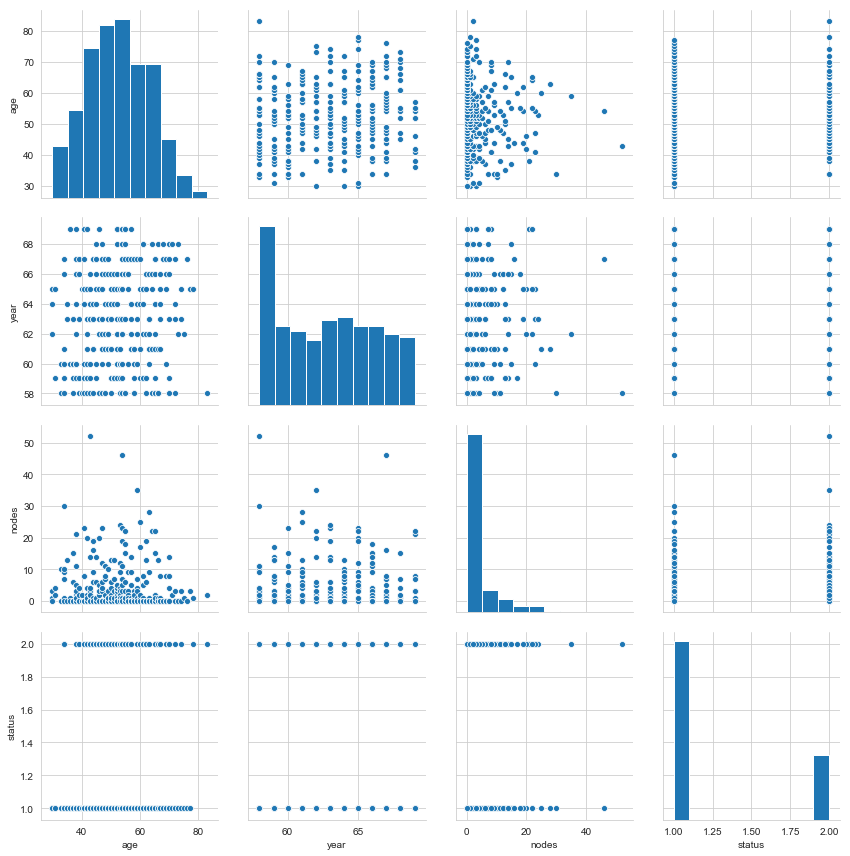

In [49]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,size=3)##hue="age"
plt.show()

### observation:
                we can visualize each and every feature of the dataset.
                class 1 and 2 are very overlaped

# 3.Uni-variate analysis

## 3.1 histogram,pdf,cdf

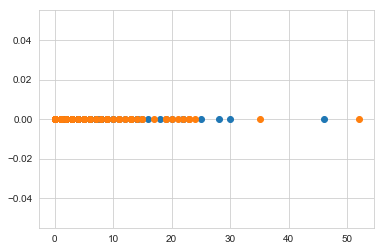

In [30]:
import numpy as np
survive = df.loc[df["status"]==1]
not_survive = df.loc[df["status"]==2]
#print(not_survive["year"])
plt.plot(survive["nodes"],np.zeros_like(survive["nodes"]),'o')
plt.plot(not_survive["nodes"],np.zeros_like(not_survive["nodes"]),'o')
plt.show()

### observation:
                this is 1D-scatter plot...in this plot data's overlapped to each-other..and there is no second dimension.
                so its very harder to make sense a plot

##  3.2 Histogram & PDF(Probability density function) :

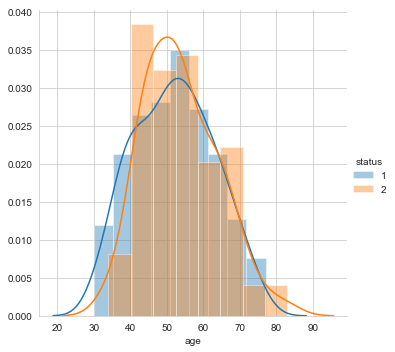

In [31]:
## here we choosed age wise 
import seaborn as sns
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,"age").add_legend()
plt.show()
### we are plotting age wise.

### observation: 
this plot is massive overlapped to eachother here it start from same point and mostly those are overlapped.
    so we are not using this plot

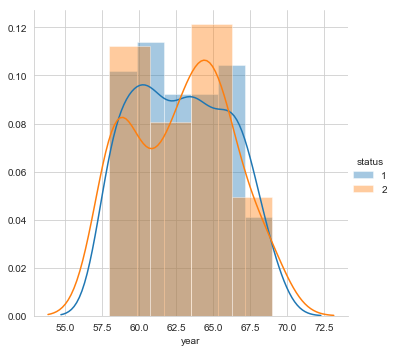

In [32]:
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,"year").add_legend()
plt.show()

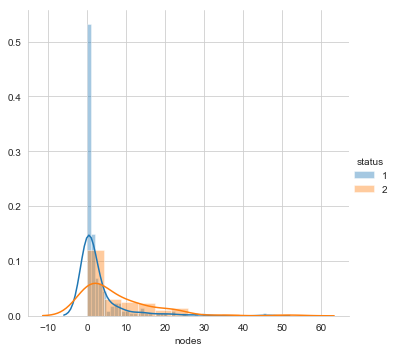

In [33]:
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,"nodes").add_legend()
plt.show()

### observation of histogram:
                      as compare to 3 plots its very difficult to chooose one plot because all plots are 
                      overlapped to eachother  but here we choosed 1st (age) plot


## 3.3 CDF(Cumulative distribution function):-

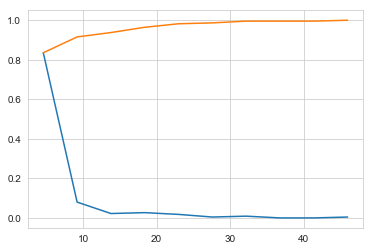

In [34]:
counts,bin_edges = np.histogram(survive['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
#print(pdf)
#print(bin_edges)

## compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

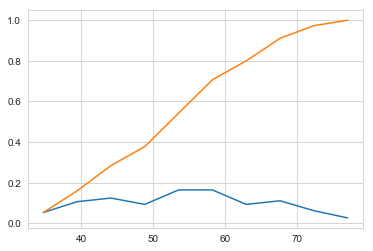

In [35]:
counts,bin_edges = np.histogram(survive['age'],bins=10,density=True)
pdf = counts/sum(counts)
#print(pdf)
#print(bin_edges)

## compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

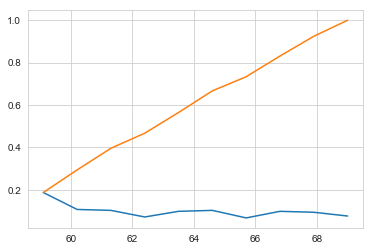

In [36]:
counts,bin_edges = np.histogram(survive['year'],bins=10,density=True)
pdf = counts/sum(counts)
#print(pdf)
#print(bin_edges)
## compute cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

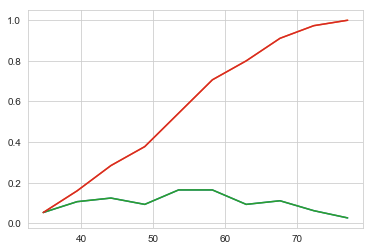

In [37]:
counts,bin_edges = np.histogram(survive["age"],bins=10,density=True)
pdf = counts/sum(counts)

## compute CDF for survive
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


##compute CDF for not survive
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()



## 3.4 Boxplot and whiskers :-

[]

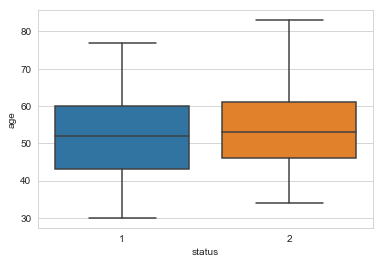

In [52]:
sns.boxplot(x="status",y="age",data=df)
plt.plot()

## observation :
                    
                            class 1 :-
                                    25 % age lies on 34
                                    50% age lies on 52
                                    75% --- 60
                            class 2 :-
                                    25 % age lies on 46
                                    50% age lies on 54
                                    75% --- 62

## 3.5 violin plot :-

[]

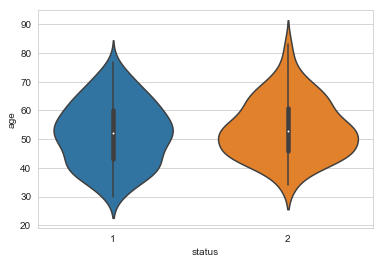

In [53]:
sns.violinplot(x="status",y="age",data=df)
plt.plot()

## observation :
                1) Violin plot is the combination of box plot and probability density function.


# Mean,variance and std-dev

In [54]:
print("Mean :")
print(np.mean(survive["age"]))
print(np.mean(not_survive["age"]))

print("\n")
print("standard deviation")
print(np.std(survive["age"]))
print(np.std(not_survive["age"]))


Mean :
52.01777777777778
53.67901234567901


standard deviation
10.987655475100508
10.104182193031312


# median ,Percentile

In [55]:
print("Median")
print(np.median(survive["age"]))
print(np.median(not_survive["age"]))

print("\nQuantile")
print(np.percentile(survive["age"],np.arange(0,25,100)))
print(np.percentile(not_survive["age"],np.arange(0,25,100)))

print("\n90th percentile")
print(np.percentile(survive["age"],90))
print(np.percentile(not_survive["age"],90))




Median
52.0
53.0

Quantile
[30.]
[34.]

90th percentile
67.0
67.0


# 4. Multivariate probability density, contour plot.


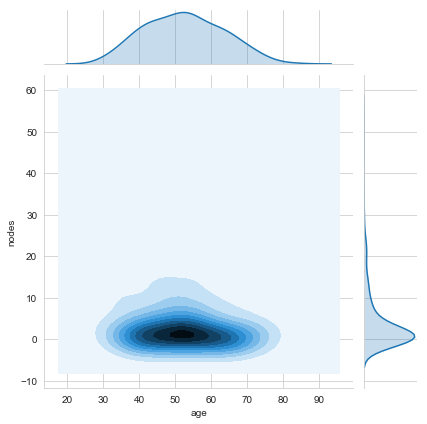

In [56]:
sns.jointplot(x="age",y="nodes",data=df,kind="kde")
plt.show()